In [5]:
#!pip install --upgrade tensorflow

In [6]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [8]:
!pwd

/content


In [9]:
digits = pd.read_csv("/content/drive/MyDrive/colab/letter-recognition.csv",header=None)

In [10]:
target=digits[0]
target=target.to_list()
images_s = digits.iloc[: , 1:]
images_s=images_s.values
images_s[0]

array([ 2,  8,  3,  5,  1,  8, 13,  0,  6,  6, 10,  8,  0,  8,  0,  8])

In [11]:
images=[]
for i in range(0,20000):
    c=[]
    c=np.reshape(images_s[i], (4,4))
    images.append(c)
images[0]

array([[ 2,  8,  3,  5],
       [ 1,  8, 13,  0],
       [ 6,  6, 10,  8],
       [ 0,  8,  0,  8]])

In [12]:
x=images_s
y=target

In [13]:
x.shape

(20000, 16)

In [14]:
# 25% of the data is kept apart for testing
x_train = x[:15000]     #train dataset
y_train = y[:15000]     #train dataset
x_test = x[15000:]      #test dataset
y_test = y[15000:]      #test dataset
print(np.shape(y_train))
print(len(x_test))

(15000,)
5000


In [15]:
x_train = x_train.reshape(x_train.shape[0], 4, 4)
x_test = x_test.reshape(x_test.shape[0], 4, 4)
input_shape = (4, 4)
#input_shape = 16

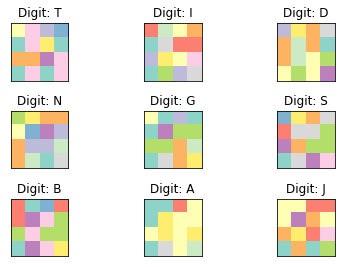

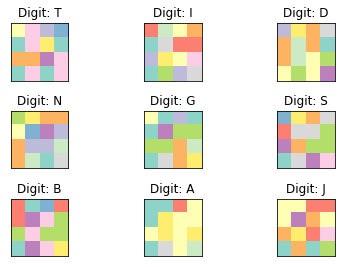

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='Set3', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [17]:
#import the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

In [18]:
#One-Hot Encoding
'''
ytrain_mapping = {x: i for i,x in enumerate(y_train)}
ytrain_vec = [ytrain_mapping[word] for word in y_train]

ytest_mapping = {x: i for i,x in enumerate(y_test)}
ytest_vec = [ytest_mapping[word] for word in y_test]

#y_train_one_hot = to_categorical(y_train)
y_train_one_hot = to_categorical(ytrain_vec)
#y_train_one_hot = np.diag(y_train_one_hot)
#y_train_one_hot = y_train_one_hot.reshape(15000,1)
#y_test_one_hot = to_categorical(y_test)
y_test_one_hot = to_categorical(ytest_vec)
'''

X1=np.zeros((15000,26))
for i in range(len(x_train)):
  X1[i,ord(y_train[i])-65]=1

print(X1[1,:])

X2=np.zeros((5000,26))
for i in range(len(x_test)):
  X2[i,ord(y_test[i])-65]=1

print(X2[1,:])


'''
#Print the new label
print(y_train_one_hot[5])
print(np.shape(y_train_one_hot))
print(np.shape(x_train))
print(np.shape(y_train_one_hot))

print(np.shape(x_test))
print(np.shape(y_test_one_hot))
'''

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0.]


'\n#Print the new label\nprint(y_train_one_hot[5])\nprint(np.shape(y_train_one_hot))\nprint(np.shape(x_train))\nprint(np.shape(y_train_one_hot))\n\nprint(np.shape(x_test))\nprint(np.shape(y_test_one_hot))\n'

In [19]:
model = Sequential()
model.add(Conv2D(64, kernel_size=2, activation='relu', input_shape=(4,4,1)))
model.add(Conv2D(32, kernel_size=2, activation='relu'))
model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(26, activation='softmax'))

In [20]:
#Compile the model
import keras 
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
#print(y_train_one_hot[0])
#print(np.shape(y_train_one_hot.T[0]))
#x_train = np.asarray(y_train_one_hot).astype('float32').reshape((-1,1))
#x_test = np.asarray(y_test_one_hot).astype('float32').reshape((-1,1))
#y_test_one_hot=np.hstack((y_test_one_hot, np.zeros((5000,10000))))
hist = model.fit(x_train, X1, steps_per_epoch=None, epochs=10 )
#hist = model.fit(x_test, y_test_one_hot, epochs=3 )

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 0.1673 - accuracy: 0.2282
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1034 - accuracy: 0.4934
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.5803
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.6517
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.6902
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.7224
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0584 - accuracy: 0.7427
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0549 - accuracy: 0.7621
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0515 - accuracy: 0.7775
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0489 - accuracy: 0.7866

In [22]:
#print(type(model))
#print(type(hist))
test_loss, test_acc = model.evaluate(x_test, X2, verbose='auto')


157/157 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.7804


In [23]:
#print(y_train_one_hot)